In [11]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
import skimage
from projection import angles2projective, hom2img_matrix, angles2sphere
from projection.plot import plot_spherical_img, fix_zorder, get_figsize, set_default_params

In [12]:
set_default_params()


tud3d = [c / 255 for c in [0,113,94]]

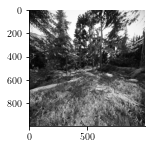

In [13]:
img = skimage.io.imread("/home/dominik/HESSENBOX-DA/new-scenes/2020-10-21_13-48/full/screen_0.png", as_gray=True)
img = skimage.transform.resize(img, (1000, 1000))

img_color = skimage.io.imread("/home/dominik/HESSENBOX-DA/new-scenes/2020-10-21_13-48/full/screen_0.png", as_gray=False)
img_color = skimage.transform.resize(img_color, (1000, 1000))

total_size = 5954
# img = skimage.transform.resize(img, (total_size, total_size))
actual_size = img.shape[0]
plt.imshow(img, cmap="gray")

In [14]:
r = 16.67 / 2
eccentricities = np.deg2rad([0, 30, 50])
polar = np.deg2rad([0, 45, 90, 135, 180, 225, 270, 315])

grid = np.meshgrid(eccentricities, polar)
ecc, pol = (x.flatten() for x in grid)

(-0.5, 999.5, 999.5, -0.5)

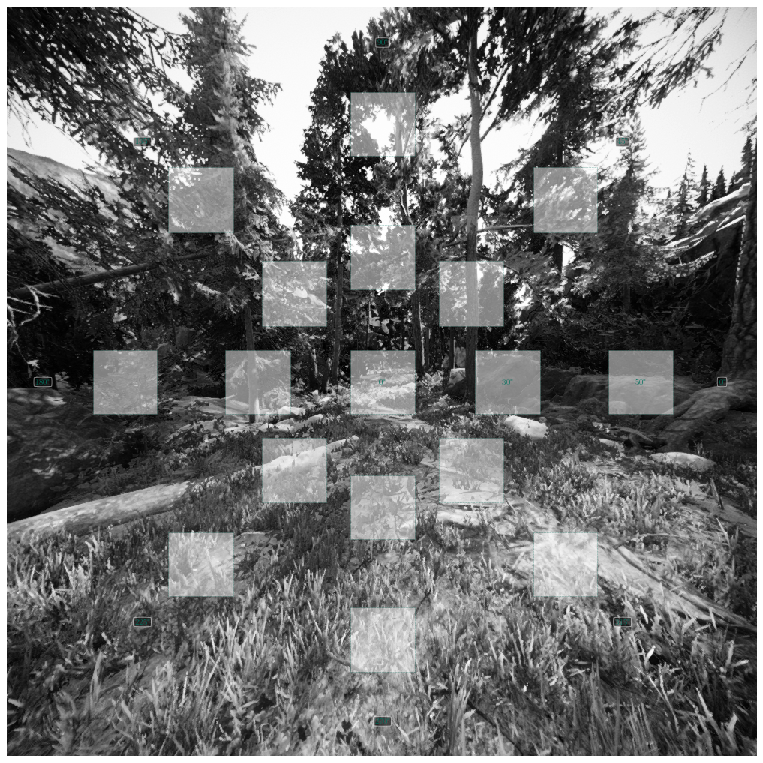

In [15]:
from matplotlib.patches import Rectangle, Circle

r = 16.67 / 2

f, ax = plt.subplots(figsize=get_figsize(2, ratio=1))
ax.imshow(img, cmap="gray", interpolation="none")

px = angles2projective(r * np.ones_like(ecc), ecc, pol)
px[2] = 1.

K = hom2img_matrix(r, img.shape[0], np.deg2rad(120))
pimg = K @ px

patch_size = actual_size / total_size * 512
for i, p in enumerate(pimg.T):
    
    ecc_i, pol_i = int(np.rad2deg(ecc[i]).round()), int(np.rad2deg(pol[i]).round())
    
    # Create a Rectangle patch
    rect = Rectangle((p[0] - patch_size / 2, p[1] - patch_size / 2),patch_size,patch_size,
                     linewidth=0.5, linestyle='--', edgecolor=tud3d, facecolor='white', alpha=0.5)
    
    if not (ecc_i == 0 and pol_i != 0):
        # Add the patch to the Axes
        ax.add_patch(rect)
    
    if pol[i] == 0:
        t = ax.text(p[1], p[0], "{}°".format(ecc_i), ha="center", va="center",
                    color=tud3d, fontsize=8)
    #ax.scatter(p[0], p[1], color="red", marker="x")
    
textecc = np.deg2rad([57.5]*8)
textpol = np.deg2rad([0, 45, 90, 135, 180, 225, 270, 315])

ptext = angles2projective(r * np.ones_like(textecc), textecc, textpol)
ptext[2] = 1.
K = hom2img_matrix(r, img.shape[0], np.deg2rad(120))
pitext = K @ ptext

for poli, pi in zip(np.rad2deg(textpol).astype(int), pitext.T):
    t = ax.text(pi[1], pi[0], "{}°".format(poli), ha="center", va="center", color=tud3d, fontsize=8)
    t.set_bbox(dict(facecolor="black", edgecolor="white", alpha=0.5, boxstyle="round4", pad=0.18))

ax.set_rasterized(True)
plt.axis("off")

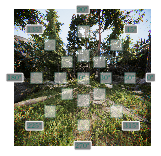

In [16]:
fontsize = 7

f, ax = plt.subplots(figsize=get_figsize(0.33, base_figsize=6.26894, ratio=1))
ax.imshow(img_color, cmap="gray", interpolation="none")

px = angles2projective(r * np.ones_like(ecc), ecc, pol)
px[2] = 1.

K = hom2img_matrix(r, img.shape[0], np.deg2rad(120))
pimg = K @ px

patch_size = actual_size / total_size * 512
for i, p in enumerate(pimg.T):
    
    ecc_i, pol_i = int(np.rad2deg(ecc[i]).round()), int(np.rad2deg(pol[i]).round())
    
    # Create a Rectangle patch
    rect = Rectangle((p[0] - patch_size / 2, p[1] - patch_size / 2),patch_size,patch_size,
                     linewidth=0.5, linestyle='--', edgecolor=tud3d, facecolor='white', alpha=0.5)
    
    if not (ecc_i == 0 and pol_i != 0):
        # Add the patch to the Axes
        ax.add_patch(rect)
    
    if pol[i] == 0:
        t = ax.text(p[1], p[0], "{}°".format(ecc_i), ha="center", va="center",
                    color=tud3d, fontsize=fontsize)
    #ax.scatter(p[0], p[1], color="red", marker="x")
    
textecc = np.deg2rad([60]*8)
textpol = np.deg2rad([0, 45, 90, 135, 180, 225, 270, 315])

ptext = angles2projective(r * np.ones_like(textecc), textecc, textpol)
ptext[2] = 1.
K = hom2img_matrix(r, img.shape[0], np.deg2rad(120))
pitext = K @ ptext

for poli, pi in zip(np.rad2deg(textpol).astype(int), pitext.T):
    t = ax.text(pi[1], pi[0], "{}°".format(poli), ha="center", va="center", color=tud3d, fontsize=fontsize)
    t.set_bbox(dict(facecolor="gray", edgecolor="white", alpha=1., boxstyle="round", pad=0.18))


plt.axis("off")
plt.tight_layout(pad=0.25)

In [17]:
figure_width, figure_height = get_figsize(0.5, ratio=1)

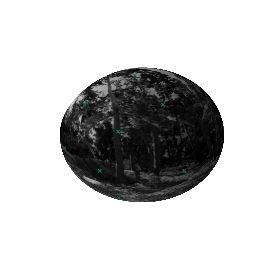

In [18]:
import matplotlib as mpl 

fig, ax = plot_spherical_img(img, r=16.67/2, phicount=500, thetacount=500, view_init=dict(azim=-30), figsize=(figure_width+0.5, figure_width+0.5))

phideg = [0, 30, 50, 30, 50, 30, 50, 30]
thetadeg = [0, 90, 90, 45, 45, 0, 0, 315]
phis = np.deg2rad(np.array(phideg))
thetas = np.deg2rad(np.array(thetadeg))
xs, ys, zs = angles2sphere(r, np.repeat(phis, 10), np.repeat(thetas, 10))

ax.scatter(
    zs, xs, ys, color=tud3d, marker='x', s=10, linewidths=0.4)

fix_zorder(ax)

ax.set_rasterized(True)
    


"""
for i, (ecc_i, pol_i) in enumerate(zip(phideg, thetadeg)):
    t = ax.text(zs[i*10], xs[i*10] - 0.5, ys[i*10], "({}, {})".format(ecc_i, pol_i), None, zorder=10_000, color="red", fontsize=8)
    t.set_bbox(dict(facecolor="black", edgecolor="white", alpha=0.3, boxstyle="round4", pad=0.18))
"""

#ax.set_aspect("equal")
plt.axis("off")
plt.tight_layout()

In [19]:
# setup meshgrid
phi = np.linspace(0.0, np.deg2rad(60), 100)
theta = np.linspace(0.0, 2.0*np.pi, 100)
phigrid, thetagrid = np.meshgrid(phi, theta)

x, y, z = angles2sphere(r, phigrid, thetagrid)

In [20]:
from projection.homography import tangential_plane_matrix
from projection import angles2projective
from projection.tangential_plane import tangential_plane, angles2tangential
from projection.aux_functions import sphere2projective, cartesian2spherical
from projection.plot import plot_plane, fix_zorder

import itertools

def compute_error(t, ecc0, polar0, r=16.67/2):
    _, ecc, polar = cartesian2spherical(t)

    # point on the sphere
    l = angles2sphere(r, ecc, polar)

    return np.linalg.norm(t - l.T)

def compute_corners(ecc0, polar0, r=16.67/2, patch_size=128, fov=np.deg2rad(120), total_img_size=5954):
    
    ecc_max = fov / 2
    
    # get maximal coordinates on image plane
    x_max, y_max, z_max = angles2projective(r, np.array([ecc_max]), np.array([0]))

    # compute pixel size
    pixel_size = abs(2 * x_max / total_img_size)[0]
    
    v1, v2, s = tangential_plane_matrix(r, ecc0, polar0).T

    topright = s + patch_size / 2 * pixel_size * (v1 + v2)
    bottomleft = s + patch_size / 2 * pixel_size * (-v1 - v2)
    topleft = s + patch_size / 2 * pixel_size * (v1 - v2)
    bottomright = s + patch_size / 2 * pixel_size * (-v1 + v2)
    
    return [topright, topleft, bottomleft, bottomright]


def compute_max_error(ecc0, polar0, r=16.67/2, patch_size=128, fov=np.deg2rad(120), total_img_size=5954):
    
    corners = compute_corners(ecc0, polar0, r, patch_size, fov, total_img_size)
    
    errors = max([compute_error(t, ecc0, polar0, r) for t in corners])
    
    return errors

eccentricities = np.deg2rad([0, 30, 50])
polars = np.deg2rad([0, 45, 90, 135, 180, 225, 270, 315])

angles = itertools.product(eccentricities, polars)
angles = [(ecc, pol) for (ecc, pol) in angles if not (ecc == 0 and pol != 0)]

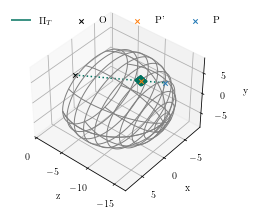

In [21]:
# initialize figure and 3d axis
fig = plt.figure(figsize=(figure_width, figure_width))
ax = fig.add_subplot(111, projection='3d')

# plot the image
ax.plot_wireframe(
    z, x, y, rstride=10, cstride=10, color="gray", linewidth=1)

# adjust axis
ax.set_xlim([0, -2 * r])
ax.set_ylim([r, -r])
ax.set_zlim([-r, r])
ax.set_xlabel("z")
ax.set_ylabel("x")
ax.set_zlabel("y")

ax.view_init(azim=-50, elev=40)

# angles of point at which to make tangential plane
ecc0, polar0 = np.deg2rad(30), np.deg2rad(90)

point, normal = tangential_plane(r, ecc0, polar0)



# angles of a point
ecc = ecc0#np.deg2rad(50)
polar = polar0#np.deg2rad(90)
l = angles2sphere(r, ecc, polar)


# plot the point on the projective plane
p = sphere2projective(l)


error = compute_error(p, ecc0, polar0)


# plot the point on the tangential plnae
t = angles2tangential(ecc=ecc, polar=polar, r0=r, ecc0=ecc0, polar0=polar0)
corners = np.array(compute_corners(ecc0, polar0))


plot_plane(point, normal, ax=ax, xrange=(corners[:,0].min(), corners[:,0].max()), yrange=(corners[:,1].min(), corners[:,1].max()), color=tud3d, label=r"$\Pi_{T}$", zorder=100000)
fix_zorder(ax)

ax.scatter(0, 0, 0, label="O", marker="x", color="black", linewidth=1)

# plot the point on the sphere
ax.scatter(l[2], l[0], l[1], label="P'", marker="x", color="C1", linewidth=1)
fix_zorder(ax)
#ax.scatter(t[2], t[0], t[1], label=f"point on tangential plane, error = {error.round(2)}")
# plot the center of the tang. plane
#ax.scatter(point[2], point[0], point[1], label="center of tangential plane")
ax.scatter(p[2], p[0], p[1], label="P", marker="x", color="C0", linewidth=1)
fix_zorder(ax)

for corner in corners:
    #ax.scatter(corner[2], corner[0], corner[1], color="blue")
    
    _, ecct, polart = cartesian2spherical(corner)

    #spherecorner = angles2sphere(r, ecct, polart)
    
    #ax.scatter(spherecorner[2], spherecorner[0], spherecorner[1], color="red")


# plot a line from the camera center through the three versions of the same point
line = np.hstack([np.array([[0,0,0]]).T, l, t, p])
ax.plot(line[2], line[0], line[1], linestyle=":", color=tud3d)#, label="[0,0,0] -> p")
#fix_zorder(ax)

#ax.set_rasterized(True)

plt.legend(frameon=False, fontsize=10, loc="upper center", ncol=4)

In [22]:
figure_width, figure_height = get_figsize(0.33, base_figsize=6.26894, ratio=1)

figure_width

2.0687502

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

fig, ax = plot_spherical_img(img, r=16.67/2, phicount=500, thetacount=500, view_init=dict(azim=-30), figsize=(figure_width+0.5, figure_width+0.5))

phideg = [0, 30, 50, 30, 50, 30, 50, 30]
thetadeg = [0, 90, 90, 45, 45, 0, 0, 315]
phis = np.deg2rad(np.array(phideg))
thetas = np.deg2rad(np.array(thetadeg))
xs, ys, zs = angles2sphere(r, np.repeat(phis, 10), np.repeat(thetas, 10))

#ax.scatter(
#    zs, xs, ys, color=tud3d, marker='x', s=140, linewidths=0.4)

#fix_zorder(ax)
    


"""
for i, (ecc_i, pol_i) in enumerate(zip(phideg, thetadeg)):
    t = ax.text(zs[i*10], xs[i*10] - 0.5, ys[i*10], "({}, {})".format(ecc_i, pol_i), None, zorder=10_000, color="red", fontsize=8)
    t.set_bbox(dict(facecolor="black", edgecolor="white", alpha=0.3, boxstyle="round4", pad=0.18))"""


for phi, theta in zip(phideg, thetadeg):
    # angles of point at which to make tangential plane
    ecc0, polar0 = np.deg2rad(phi), np.deg2rad(theta)
    corners = compute_corners(ecc0, polar0)
    corners = np.array(corners)

    point, normal = tangential_plane(r, ecc0, polar0)

    verts = [list(corners[:,[2,0,1]])]
    poly = Poly3DCollection(verts, facecolors=tud3d, edgecolors="k", alpha=0.5)
    poly.set_edgecolor(tud3d)
    ax.add_collection3d(poly)
    
    #fix_zorder(ax)
    #ax.add_collection3d(Line3DCollection([verts[0]+[verts[0][0]]+[verts[0][1]]], colors=tud3d, linewidths=5, linestyles='-'))
    fix_zorder(ax)



#plot_plane(point, normal, ax=ax, xrange=(corners[:,0].min(), corners[:,0].max()), yrange=(corners[:,1].min(), corners[:,1].max()), alpha=.2, color=tud3d, label=r"$\Pi_{T}$")



#ax.set_aspect("equal")
plt.axis("off")
plt.tight_layout()